In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *

from epsampling.utils import load_csv
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
from epsampling.utils import drop_sers_with_nans
from epsampling.utils import date_str_to_int

DATA_DIR = '/work/users/k/4/k4thryn/Repos/EpSampling/data/'
DT = datetime.today().strftime('%Y%m%d-%H%M%S')

from IPython.display import Audio

def meow():
    display(Audio(filename='../cat_meow2.wav', autoplay=True))

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR,'raw','mobility.csv'))
df.columns = ['From_county','To_county','Mobility']
df

,From_county,To_county,Mobility
0,1001,1007,10
1,1001,1015,10
2,1001,1021,383
3,1001,1047,271
4,1001,1051,1624
...,...,...,...
206953,56005,56045,54
206954,56011,56045,29
206955,56019,56045,4
206956,56025,56045,15


In [3]:
df['To_state'] = df.To_county.apply(lambda x: str(x)[:-3])
df

,From_county,To_county,Mobility,To_state
0,1001,1007,10,1
1,1001,1015,10,1
2,1001,1021,383,1
3,1001,1047,271,1
4,1001,1051,1624,1
...,...,...,...,...
206953,56005,56045,54,56
206954,56011,56045,29,56
206955,56019,56045,4,56
206956,56025,56045,15,56


In [4]:
sers = []

for county in tqdm(df.From_county.unique()):
    subdf = df[df.From_county==county]
    for state in subdf.To_state.unique():
        state_mob = subdf[subdf.To_state==state].Mobility.sum()
        ser = pd.Series({ 'From_county':county,'To_state':state, 'State_mob':state_mob})
        sers.append(ser)

100%|██████████| 3139/3139 [00:21<00:00, 145.06it/s]


In [5]:
df_new = pd.DataFrame(sers)
df_new

,From_county,To_state,State_mob
0,1001,1,18836
1,1001,12,50
2,1001,13,25
3,1001,18,15
4,1001,19,4
...,...,...,...
36453,56043,46,10
36454,56043,56,137
36455,56043,8,10
36456,56045,56,196


In [11]:
df_new[:20]

,From_county,To_state,State_mob
0,1001,1,18836
1,1001,12,50
2,1001,13,25
3,1001,18,15
4,1001,19,4
5,1001,22,10
6,1001,25,4
7,1001,29,4
8,1001,37,10
9,1001,40,10


In [13]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_new.State_mob.describe()

count     36458.000
mean       1950.503
std       19273.618
min           4.000
25%          10.000
50%          25.000
75%          85.000
max     1354504.000
Name: State_mob, dtype: float64

<Axes: ylabel='Frequency'>

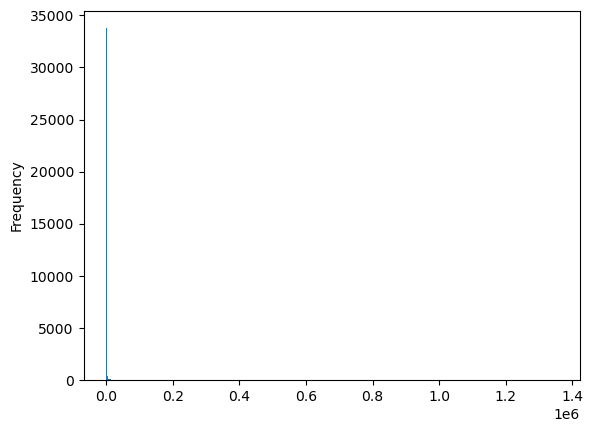

In [17]:
df_new.State_mob.plot(kind='hist',bins=1000)

In [10]:
# # # # DEATH DATA # # # #

timestamp = '20241009-144131'

fpath = os.path.join(DATA_DIR,'processed', f'processed_naive_deaths_{timestamp}.csv')
df_deaths = pd.read_csv(fpath)
## Drop rows with nans.
df_deaths.dropna(inplace=True)
## Drop samples with negative inc deaths.
df_deaths = df_deaths[df_deaths.True_inc_deaths >= 0]

# df_deaths = df_deaths[df_deaths.State_fips==37]

df_deaths = df_deaths[df_deaths.Date < 20201031]
display(df_deaths)

,Fips,State_fips,Pop,State_pop,Ratio,Date,Proj_inc_deaths,True_cum_deaths,Cum_deaths_tm1,True_inc_deaths,Naive_inc_deaths
1,1001,1,58239.0,4997675,0.011653,20200620,83.302156,9.0,6.0,3.0,0.970738
2,1001,1,58239.0,4997675,0.011653,20200627,68.179357,12.0,9.0,3.0,0.794509
3,1001,1,58239.0,4997675,0.011653,20200704,76.238975,13.0,12.0,1.0,0.888429
4,1001,1,58239.0,4997675,0.011653,20200711,88.362530,15.0,13.0,2.0,1.029708
5,1001,1,58239.0,4997675,0.011653,20200718,114.279381,21.0,15.0,6.0,1.331723
...,...,...,...,...,...,...,...,...,...,...,...
309874,56045,56,6891.0,576641,0.011950,20200926,4.000000,0.0,0.0,0.0,0.047801
309875,56045,56,6891.0,576641,0.011950,20201003,3.000000,0.0,0.0,0.0,0.035851
309876,56045,56,6891.0,576641,0.011950,20201010,3.000000,0.0,0.0,0.0,0.035851
309877,56045,56,6891.0,576641,0.011950,20201017,3.000000,0.0,0.0,0.0,0.035851


In [7]:
df_deaths

,Fips,State_fips,Pop,State_pop,Ratio,Date,Proj_inc_deaths,True_cum_deaths,Cum_deaths_tm1,True_inc_deaths,Naive_inc_deaths
184993,37001,37,169185.0,10367022,0.016320,20200620,122.952381,35.0,32.0,3.0,2.006526
184994,37001,37,169185.0,10367022,0.016320,20200627,100.308656,36.0,35.0,1.0,1.636991
184995,37001,37,169185.0,10367022,0.016320,20200704,119.399123,37.0,36.0,1.0,1.948538
184996,37001,37,169185.0,10367022,0.016320,20200711,100.119062,37.0,37.0,0.0,1.633897
184997,37001,37,169185.0,10367022,0.016320,20200718,120.176332,39.0,37.0,2.0,1.961222
...,...,...,...,...,...,...,...,...,...,...,...
194987,37199,37,18357.0,10367022,0.001771,20220409,55.000000,51.0,51.0,0.0,0.097389
194988,37199,37,18357.0,10367022,0.001771,20220416,41.000000,51.0,51.0,0.0,0.072599
194989,37199,37,18357.0,10367022,0.001771,20220423,60.000000,51.0,51.0,0.0,0.106243
194990,37199,37,18357.0,10367022,0.001771,20220430,33.000000,51.0,51.0,0.0,0.058433
